# IMDb Movie Visualizations
Full dataset can be found at https://developer.imdb.com/non-commercial-datasets/

This notebook contains various charts looking at movie runtime and ratings.
To make the charts interactive, remove the `renderer` parameter.

In [25]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [26]:
title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t', header=0)
title_basics = title_basics.replace(r'\N', np.nan)

C:\Users\wissa\AppData\Local\Temp\ipykernel_1452\1005254874.py:1: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [27]:
title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10759880,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,NaN,NaN,"Action,Drama,Family"
10759881,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,NaN,NaN,"Action,Drama,Family"
10759882,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,NaN,NaN,"Action,Drama,Family"
10759883,tt9916856,short,The Wind,The Wind,0,2015,NaN,27,Short


In [28]:
title_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', header=0)
title_ratings = title_ratings.replace(r'\N', np.nan)

In [29]:
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,2052
1,tt0000002,5.7,274
2,tt0000003,6.5,2007
3,tt0000004,5.4,179
4,tt0000005,6.2,2773
...,...,...,...
1435752,tt9916730,7.0,12
1435753,tt9916766,7.1,23
1435754,tt9916778,7.2,36
1435755,tt9916840,7.0,9


In [30]:
movies_df = pd.merge(
    title_basics[(title_basics['titleType'] == 'movie') & (title_basics['startYear'].between('1916', '2026'))], 
    title_ratings, on='tconst', how='left'
)

In [31]:
movies_df['runtimeMinutes'] = pd.to_numeric(movies_df['runtimeMinutes'])
movies_df['genres'] = movies_df['genres'].str.split(',')

In [32]:
movies_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0002423,movie,Passion,Madame DuBarry,0,1919,NaN,113.0,"[Biography, Drama, Romance]",6.6,1005.0
1,tt0002888,movie,Fulano de Tal se enamora de Manón,Fulano de Tal se enamora de Manón,0,1916,NaN,NaN,[Comedy],NaN,NaN
2,tt0003599,movie,The Adventures of Buffalo Bill,The Adventures of Buffalo Bill,0,1917,NaN,NaN,"[Documentary, Western]",6.4,26.0
3,tt0003610,movie,Alexia o La niña del misterio,Alexia o La niña del misterio,0,1916,NaN,NaN,NaN,NaN,NaN
4,tt0003632,movie,Arme Eva,Arme Eva,0,1916,NaN,NaN,[Drama],6.1,17.0
...,...,...,...,...,...,...,...,...,...,...,...
577229,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57.0,[Documentary],NaN,NaN
577230,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100.0,[Documentary],NaN,NaN
577231,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,NaN,NaN,[Comedy],7.6,5.0
577232,tt9916730,movie,6 Gunn,6 Gunn,0,2017,NaN,116.0,[Drama],7.0,12.0


In [33]:
avg_runtime_and_rating_by_year_df = movies_df.groupby('startYear').agg({'runtimeMinutes': 'mean', 'averageRating': 'mean'}).reset_index()
avg_runtime_and_rating_by_year_df

,startYear,runtimeMinutes,averageRating
0,1916,57.783520,5.897697
1,1917,59.995475,5.789590
2,1918,60.087108,5.940000
3,1919,63.336449,5.961329
4,1920,66.071244,5.810736
...,...,...,...
106,2022,92.205918,6.404005
107,2023,92.467865,6.555933
108,2024,93.624421,6.938227
109,2025,97.000000,NaN


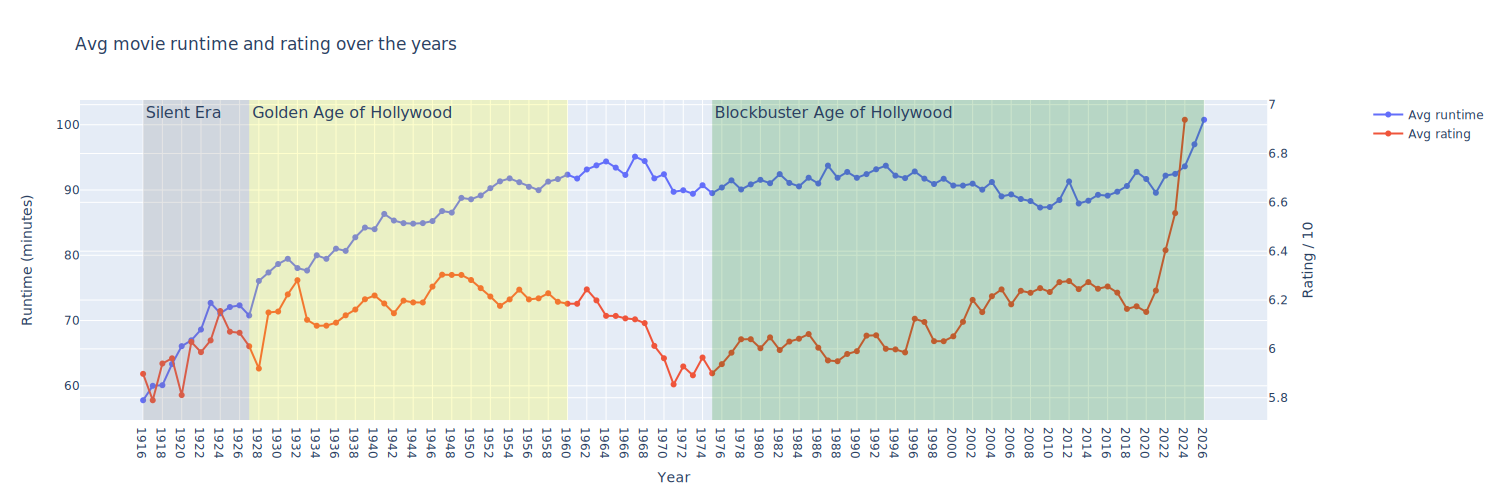

In [34]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=avg_runtime_and_rating_by_year_df["startYear"], y=avg_runtime_and_rating_by_year_df["runtimeMinutes"], mode='lines+markers', name="Avg runtime"), secondary_y=False)
fig.add_trace(go.Scatter(x=avg_runtime_and_rating_by_year_df["startYear"], y=avg_runtime_and_rating_by_year_df["averageRating"], mode='lines+markers', name="Avg rating"), secondary_y=True)
fig.update_xaxes(title_text="Year")
fig.update_yaxes(title_text="Runtime (minutes)", secondary_y=False)
fig.update_yaxes(title_text="Rating / 10", secondary_y=True)
fig.update_layout(title_text="Avg movie runtime and rating over the years")
fig.add_vrect(x0=0, x1=11,
              annotation_text="Silent Era", annotation_position="top left", annotation=dict(font_size=16),
              fillcolor="gray", opacity=0.2, line_width=0)
fig.add_vrect(x0=11, x1=44,
              annotation_text="Golden Age of Hollywood", annotation_position="top left", annotation=dict(font_size=16),
              fillcolor="yellow", opacity=0.2, line_width=0)
fig.add_vrect(x0=59, x1=110,
              annotation_text="Blockbuster Age of Hollywood", annotation_position="top left", annotation=dict(font_size=16),
              fillcolor="green", opacity=0.2, line_width=0)
fig.update_layout(width=1500)
fig.show(renderer='svg')

**Silent Era**
- Early development of movies
- No sound
- Shorter and lower quality

**Golden Age**
- Integration of sound with film
- Popular genres were defined, and cinema was ruled by the "Big Five" studios
- Decline started due to more adoption of TVs and great actors retiring

**Blockbuster Age**
- Dominated by marketing and spectacle, with high-budget productions/thrillers
- More recently, movies have been getting longer
    - This allows the characters/story to be developed and the audience to feel like they are getting their money's worth, which could be attributed to the spike in ratings

In [35]:
max_runtime = 3*60
avg_rating_by_runtime = movies_df[movies_df['runtimeMinutes'] <= max_runtime].groupby('runtimeMinutes').agg({'averageRating': 'mean'}).reset_index()
avg_rating_by_runtime

,runtimeMinutes,averageRating
0,1.0,6.166667
1,2.0,9.800000
2,3.0,7.020000
3,4.0,7.400000
4,5.0,6.000000
...,...,...
175,176.0,6.900000
176,177.0,7.042857
177,178.0,7.008000
178,179.0,7.134545


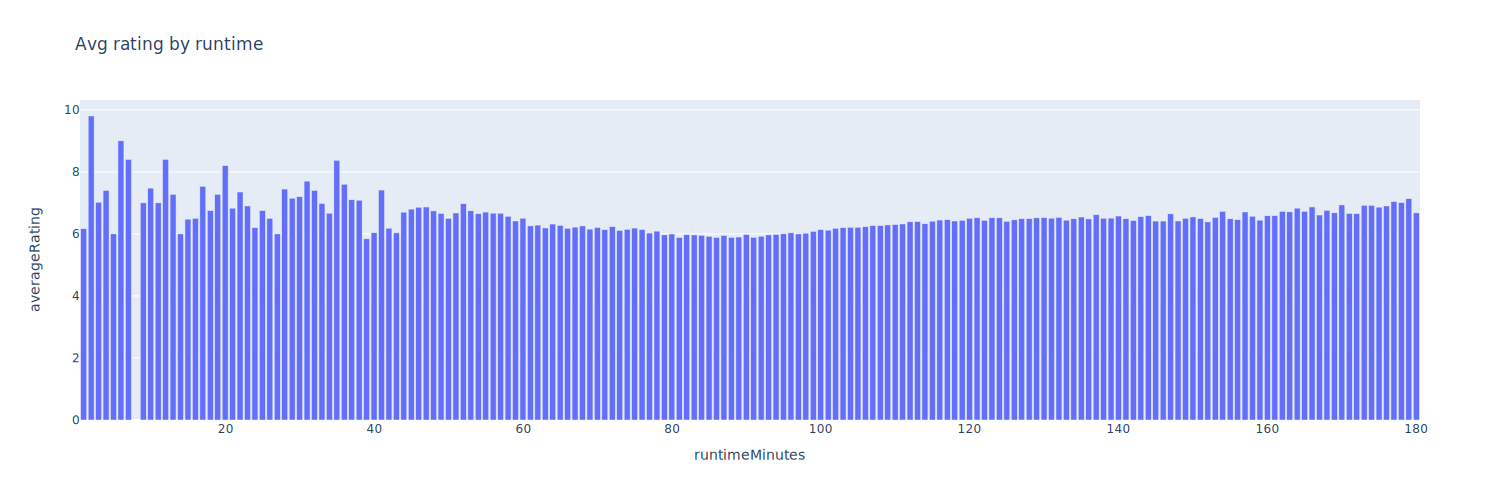

In [36]:
fig = px.bar(avg_rating_by_runtime, x="runtimeMinutes", y="averageRating", title='Avg rating by runtime')
fig.update_layout(width=1500)
fig.show(renderer='svg')

Data is too noisy, so we will try to break it up into bins.

In [37]:
max_runtime = 3*60
bin_ranges = range(0, max_runtime + 10, 10)
movies_df['runtime_bin'] = pd.cut(movies_df[movies_df['runtimeMinutes'] <= max_runtime]['runtimeMinutes'], bins=bin_ranges, right=True)
avg_rating_by_runtime_bin = movies_df[movies_df['runtimeMinutes'] <= max_runtime].groupby('runtime_bin').agg({'averageRating': 'mean'}).reset_index()
avg_rating_by_runtime_bin['runtime_bin'] = avg_rating_by_runtime_bin['runtime_bin'].astype(str)
avg_rating_by_runtime_bin

C:\Users\wissa\AppData\Local\Temp\ipykernel_1452\461512404.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,runtime_bin,averageRating
0,"(0, 10]",7.440909
1,"(10, 20]",7.165625
2,"(20, 30]",6.960000
3,"(30, 40]",6.740385
4,"(40, 50]",6.683450
5,"(50, 60]",6.639684
6,"(60, 70]",6.230951
7,"(70, 80]",6.089781
8,"(80, 90]",5.938136
9,"(90, 100]",6.004238


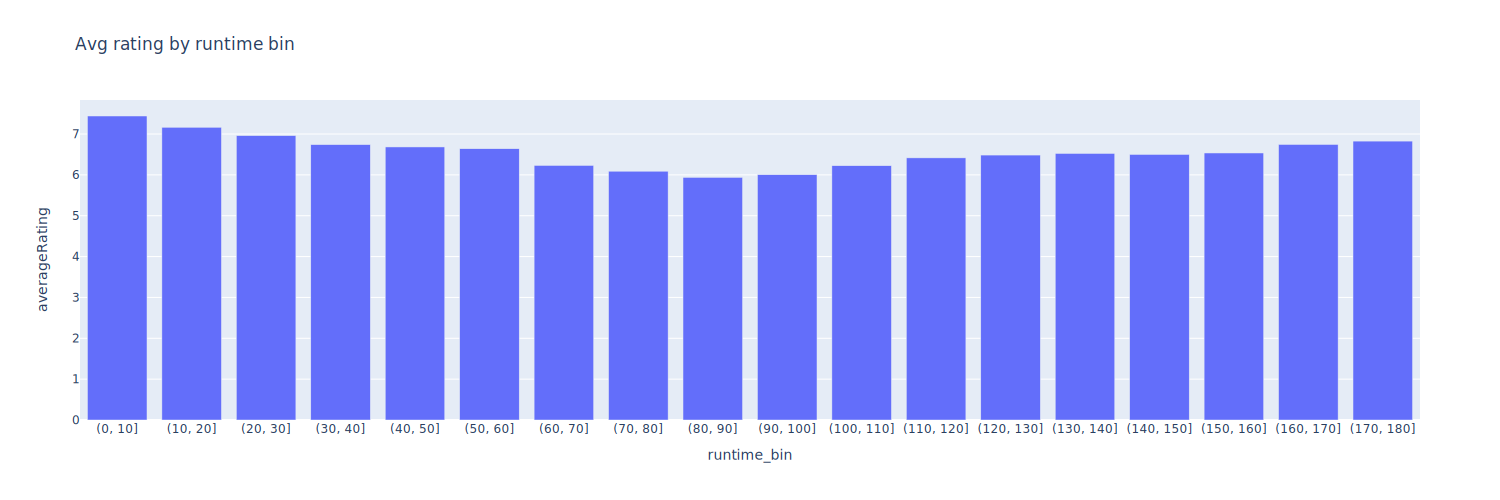

In [38]:
fig = px.bar(avg_rating_by_runtime_bin, x="runtime_bin", y="averageRating", title='Avg rating by runtime bin')
fig.update_layout(width=1500)
fig.show(renderer='svg')

There could be a few explanations for this chart:
- Low runtime short-films rely on higher quality (e.g. animations).
- High runtime movies are usually feature films with a fleshed-out narrative.
- Most movies fall around the 90-minute mark. They are not necessarily "bad", just okay.

In [39]:
max_runtime = 3*60
movies_exploded_genres = movies_df.explode('genres')

avg_rating_by_runtime_bin_and_genre = movies_exploded_genres[movies_exploded_genres['runtimeMinutes'] <= max_runtime].groupby(['runtime_bin', 'genres']).agg({'averageRating': 'mean'}).reset_index()
avg_rating_by_runtime_bin_and_genre['runtime_bin'] = avg_rating_by_runtime_bin_and_genre['runtime_bin'].astype(str)
avg_rating_by_runtime_bin_and_genre

C:\Users\wissa\AppData\Local\Temp\ipykernel_1452\1122541210.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,runtime_bin,genres,averageRating
0,"(0, 10]",Action,7.366667
1,"(0, 10]",Adult,NaN
2,"(0, 10]",Adventure,NaN
3,"(0, 10]",Animation,5.800000
4,"(0, 10]",Biography,NaN
...,...,...,...
481,"(170, 180]",Sport,7.195238
482,"(170, 180]",Talk-Show,NaN
483,"(170, 180]",Thriller,6.577551
484,"(170, 180]",War,7.139286


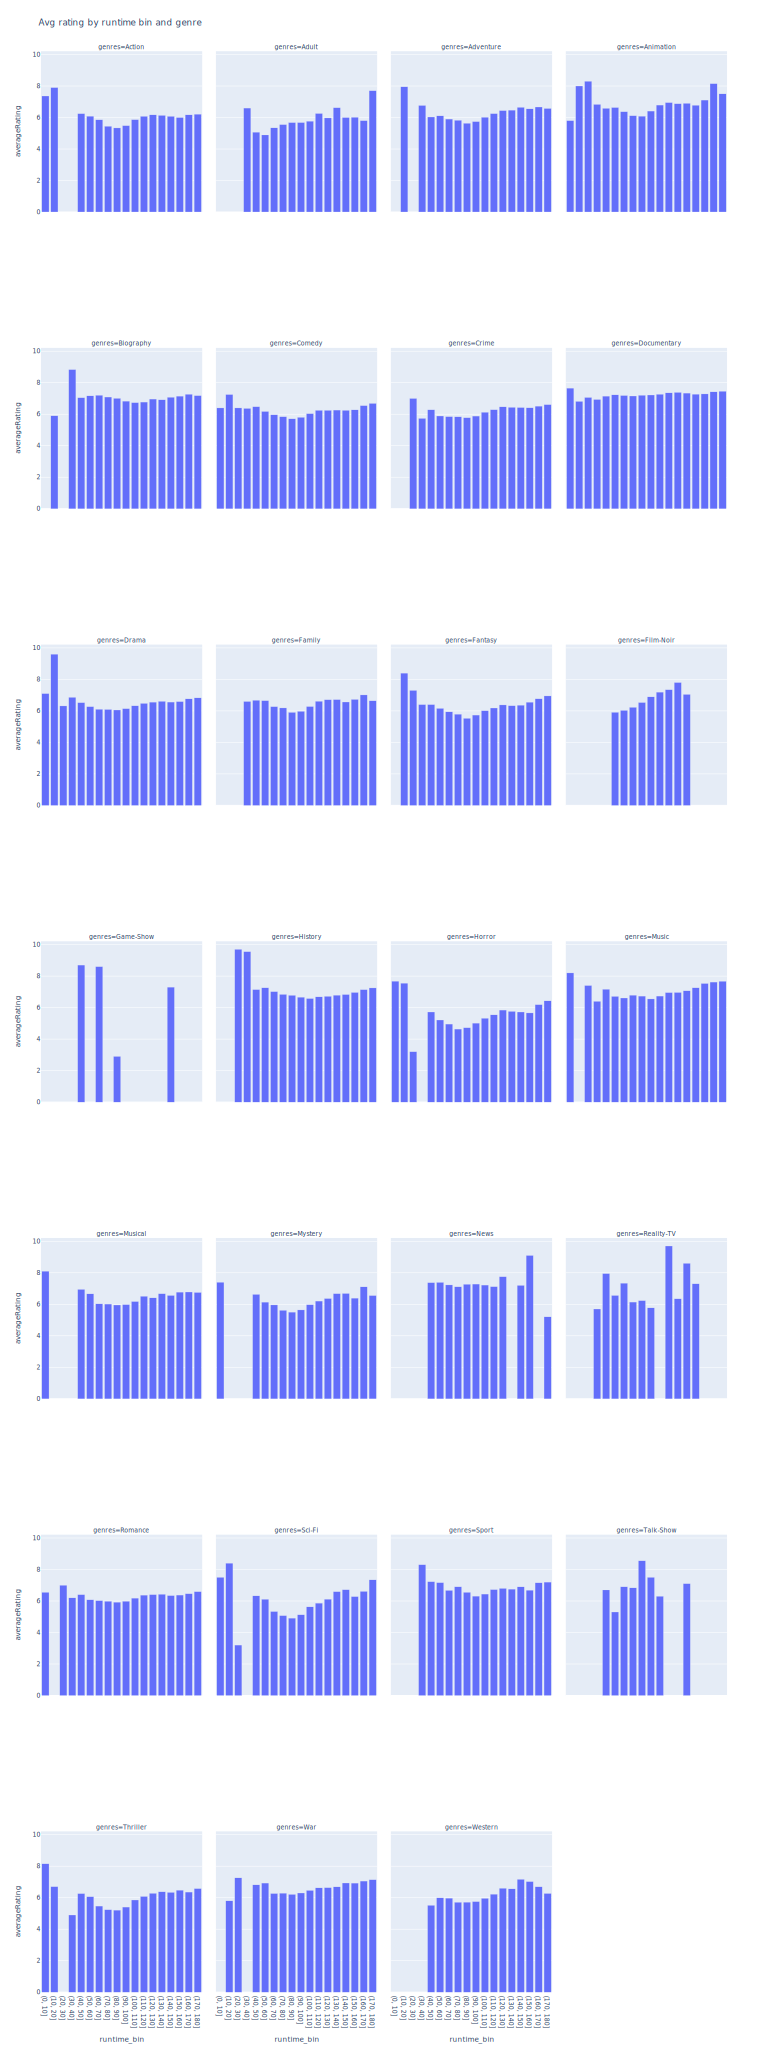

In [40]:
fig = px.bar(avg_rating_by_runtime_bin_and_genre, x="runtime_bin", y="averageRating", facet_col="genres", facet_col_wrap=4, title='Avg rating by runtime bin and genre')
fig.update_layout(height=4000, width=1500)
fig.show(renderer='svg')

Most genres follow the same pattern.